In [1]:
import pandas as pd

# Load the dataset
file_path = 'Hospital_Inpatient_Discharges.csv'
data = pd.read_csv(file_path)

data.head()

C:\Users\kypra\AppData\Local\Temp\ipykernel_41144\1795377535.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89


In [44]:
data.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [2]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Check the percentage of missing values in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the columns with missing values
print(missing_values[missing_values > 0])


Health Service Area                       5464
Hospital County                           5464
Operating Certificate Number              5464
Facility Id                               5464
Zip Code - 3 digits                      35816
APR Severity of Illness Description        111
APR Risk of Mortality                      111
Payment Typology 2                      762285
Payment Typology 3                     1645513
dtype: int64


In [3]:
print(missing_percentage[missing_percentage > 0])


Health Service Area                     0.232815
Hospital County                         0.232815
Operating Certificate Number            0.232815
Facility Id                             0.232815
Zip Code - 3 digits                     1.526078
APR Severity of Illness Description     0.004730
APR Risk of Mortality                   0.004730
Payment Typology 2                     32.480077
Payment Typology 3                     70.113395
dtype: float64


In [4]:
# Imputing missing values for columns with low missing percentages using the mode
for column in ['Health Service Area', 'Hospital County', 'Operating Certificate Number', 'Facility Id', 'APR Severity of Illness Description', 'APR Risk of Mortality']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Impute missing values for 'Zip Code - 3 digits' using the mode
zip_mode = data['Zip Code - 3 digits'].mode()[0]
data['Zip Code - 3 digits'].fillna(zip_mode, inplace=True)

# Fill missing values in 'Payment Typology 2' and 'Payment Typology 3' with 'Not Available'
data['Payment Typology 2'].fillna('Not Available', inplace=True)
data['Payment Typology 3'].fillna('Not Available', inplace=True)

# Check if there are any missing values left
missing_values_updated = data.isnull().sum()
missing_values_updated

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility Id                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

In [5]:
# Assuming the DataFrame 'data' is already loaded
print(data.dtypes)

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [6]:
# Convert 'Operating Certificate Number' and 'Facility Id' to int, handling NaNs by converting them to a type that supports NaN
data['Operating Certificate Number'] = pd.to_numeric(data['Operating Certificate Number'], downcast='integer', errors='coerce')
data['Facility Id'] = pd.to_numeric(data['Facility Id'], downcast='integer', errors='coerce')

# Convert categorical fields to category type
categorical_columns = ['Health Service Area', 'Hospital County', 'Gender', 'Race', 'Ethnicity', 'Type of Admission', 'Patient Disposition', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Emergency Department Indicator', 'Abortion Edit Indicator']
for column in categorical_columns:
    data[column] = data[column].astype('category')

data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')

# Recheck data types after conversion
print(data.dtypes)


Health Service Area                    category
Hospital County                        category
Operating Certificate Number              int32
Facility Id                               int16
Facility Name                            object
Age Group                                object
Zip Code - 3 digits                      object
Gender                                 category
Race                                   category
Ethnicity                              category
Length of Stay                          float64
Type of Admission                      category
Patient Disposition                    category
Discharge Year                            int64
CCS Diagnosis Code                        int64
CCS Diagnosis Description                object
CCS Procedure Code                        int64
CCS Procedure Description                object
APR DRG Code                              int64
APR DRG Description                      object
APR MDC Code                            

### EDA QUESTION 1: Statistical analysis of both numerical and categorical Variables

In [7]:
# Display summary statistics for numerical columns
numerical_summary = data.describe()
numerical_summary

,Operating Certificate Number,Facility Id,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
count,2.346931e+06,2.346931e+06,2.345070e+06,2346931.0,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06,2.346931e+06
mean,5.011863e+06,1.044329e+03,5.385537e+00,2015.0,1.905617e+02,1.127634e+02,4.181795e+02,1.043054e+01,2.010577e+00,3.223480e+02,4.321481e+04,1.473254e+04
std,2.259064e+06,7.128150e+02,7.360528e+00,0.0,1.596361e+02,8.892976e+01,2.413585e+02,5.924058e+00,8.974118e-01,9.842375e+02,8.046009e+04,2.819890e+04
min,1.010000e+05,1.000000e+00,1.000000e+00,2015.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,2.951001e+06,5.410000e+02,2.000000e+00,2015.0,1.060000e+02,0.000000e+00,2.010000e+02,5.000000e+00,1.000000e+00,0.000000e+00,1.202861e+04,4.410150e+03
50%,5.907001e+06,1.117000e+03,3.000000e+00,2015.0,1.590000e+02,1.320000e+02,3.830000e+02,9.000000e+00,2.000000e+00,0.000000e+00,2.348637e+04,8.191270e+03
75%,7.002012e+06,1.450000e+03,6.000000e+00,2015.0,2.180000e+02,2.160000e+02,6.400000e+02,1.500000e+01,3.000000e+00,0.000000e+00,4.661670e+04,1.577182e+04
max,7.004010e+06,9.431000e+03,1.190000e+02,2015.0,9.170000e+02,9.990000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.000000e+03,7.248391e+06,3.007713e+06


In [8]:
# Display frequency distribution for categorical columns
for column in data.select_dtypes(include=['category']).columns:
    print(f"Frequency distribution for {column}:")
    print(data[column].value_counts())
    print("\n")


Frequency distribution for Health Service Area:
Health Service Area
New York City      1096733
Long Island         339039
Hudson Valley       245594
Capital/Adirond     167130
Western NY          163826
Central NY          158094
Finger Lakes        146342
Southern Tier        30173
Name: count, dtype: int64


Frequency distribution for Hospital County:
Hospital County
Manhattan      406229
Kings          248475
Queens         197199
Bronx          187979
Nassau         181015
Suffolk        158024
Erie           120512
Westchester    119232
Monroe         105063
Onondaga        78336
Albany          65686
Richmond        56851
Orange          39436
Dutchess        32570
Rockland        31900
Oneida          29867
Broome          28538
Schenectady     22302
Niagara         17122
Warren          14072
Chemung         13837
Otsego          12245
Rensselaer      11945
Ontario         11919
Ulster          11339
St Lawrence     11073
Jefferson       10810
Chautauqua      10439
Clinton     

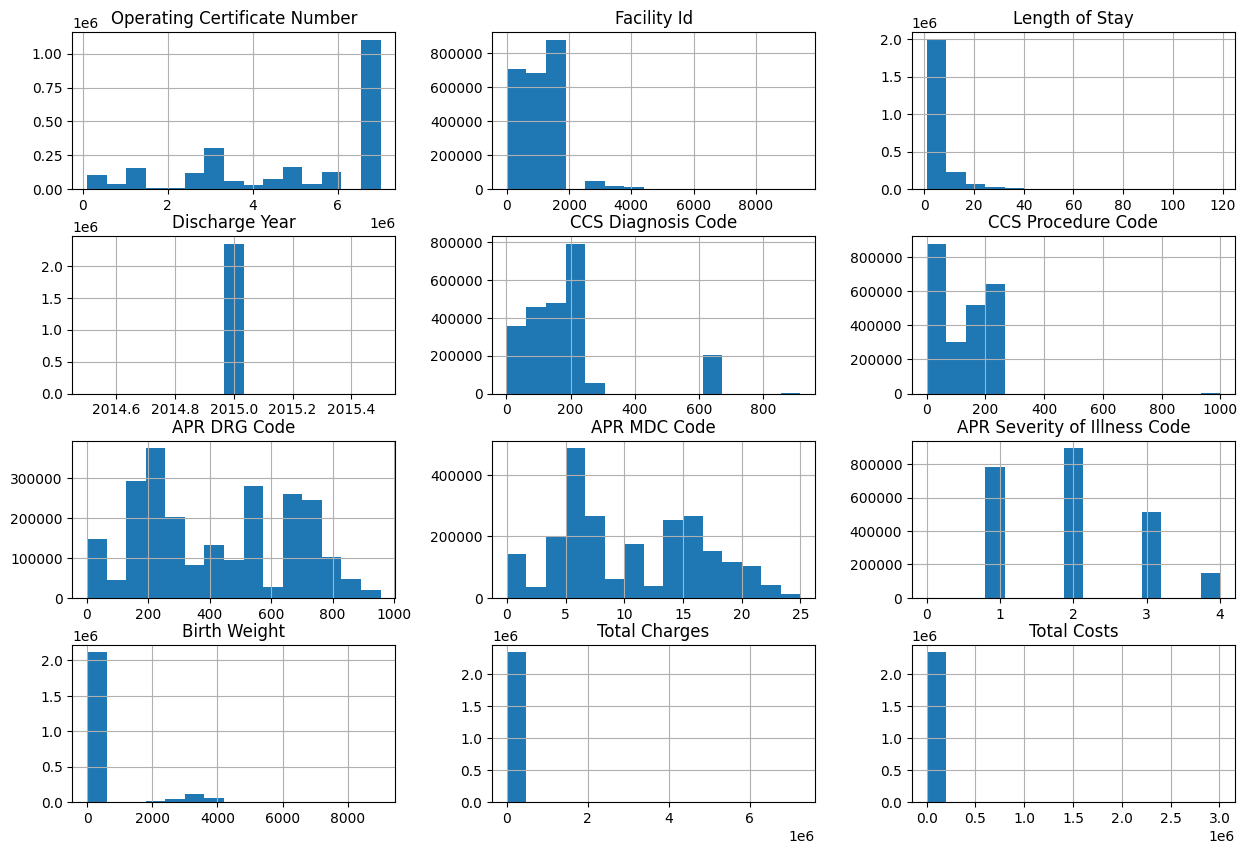

In [9]:
import matplotlib.pyplot as plt

# Histograms for numerical variables
data.hist(bins=15, figsize=(15, 10))
plt.show()




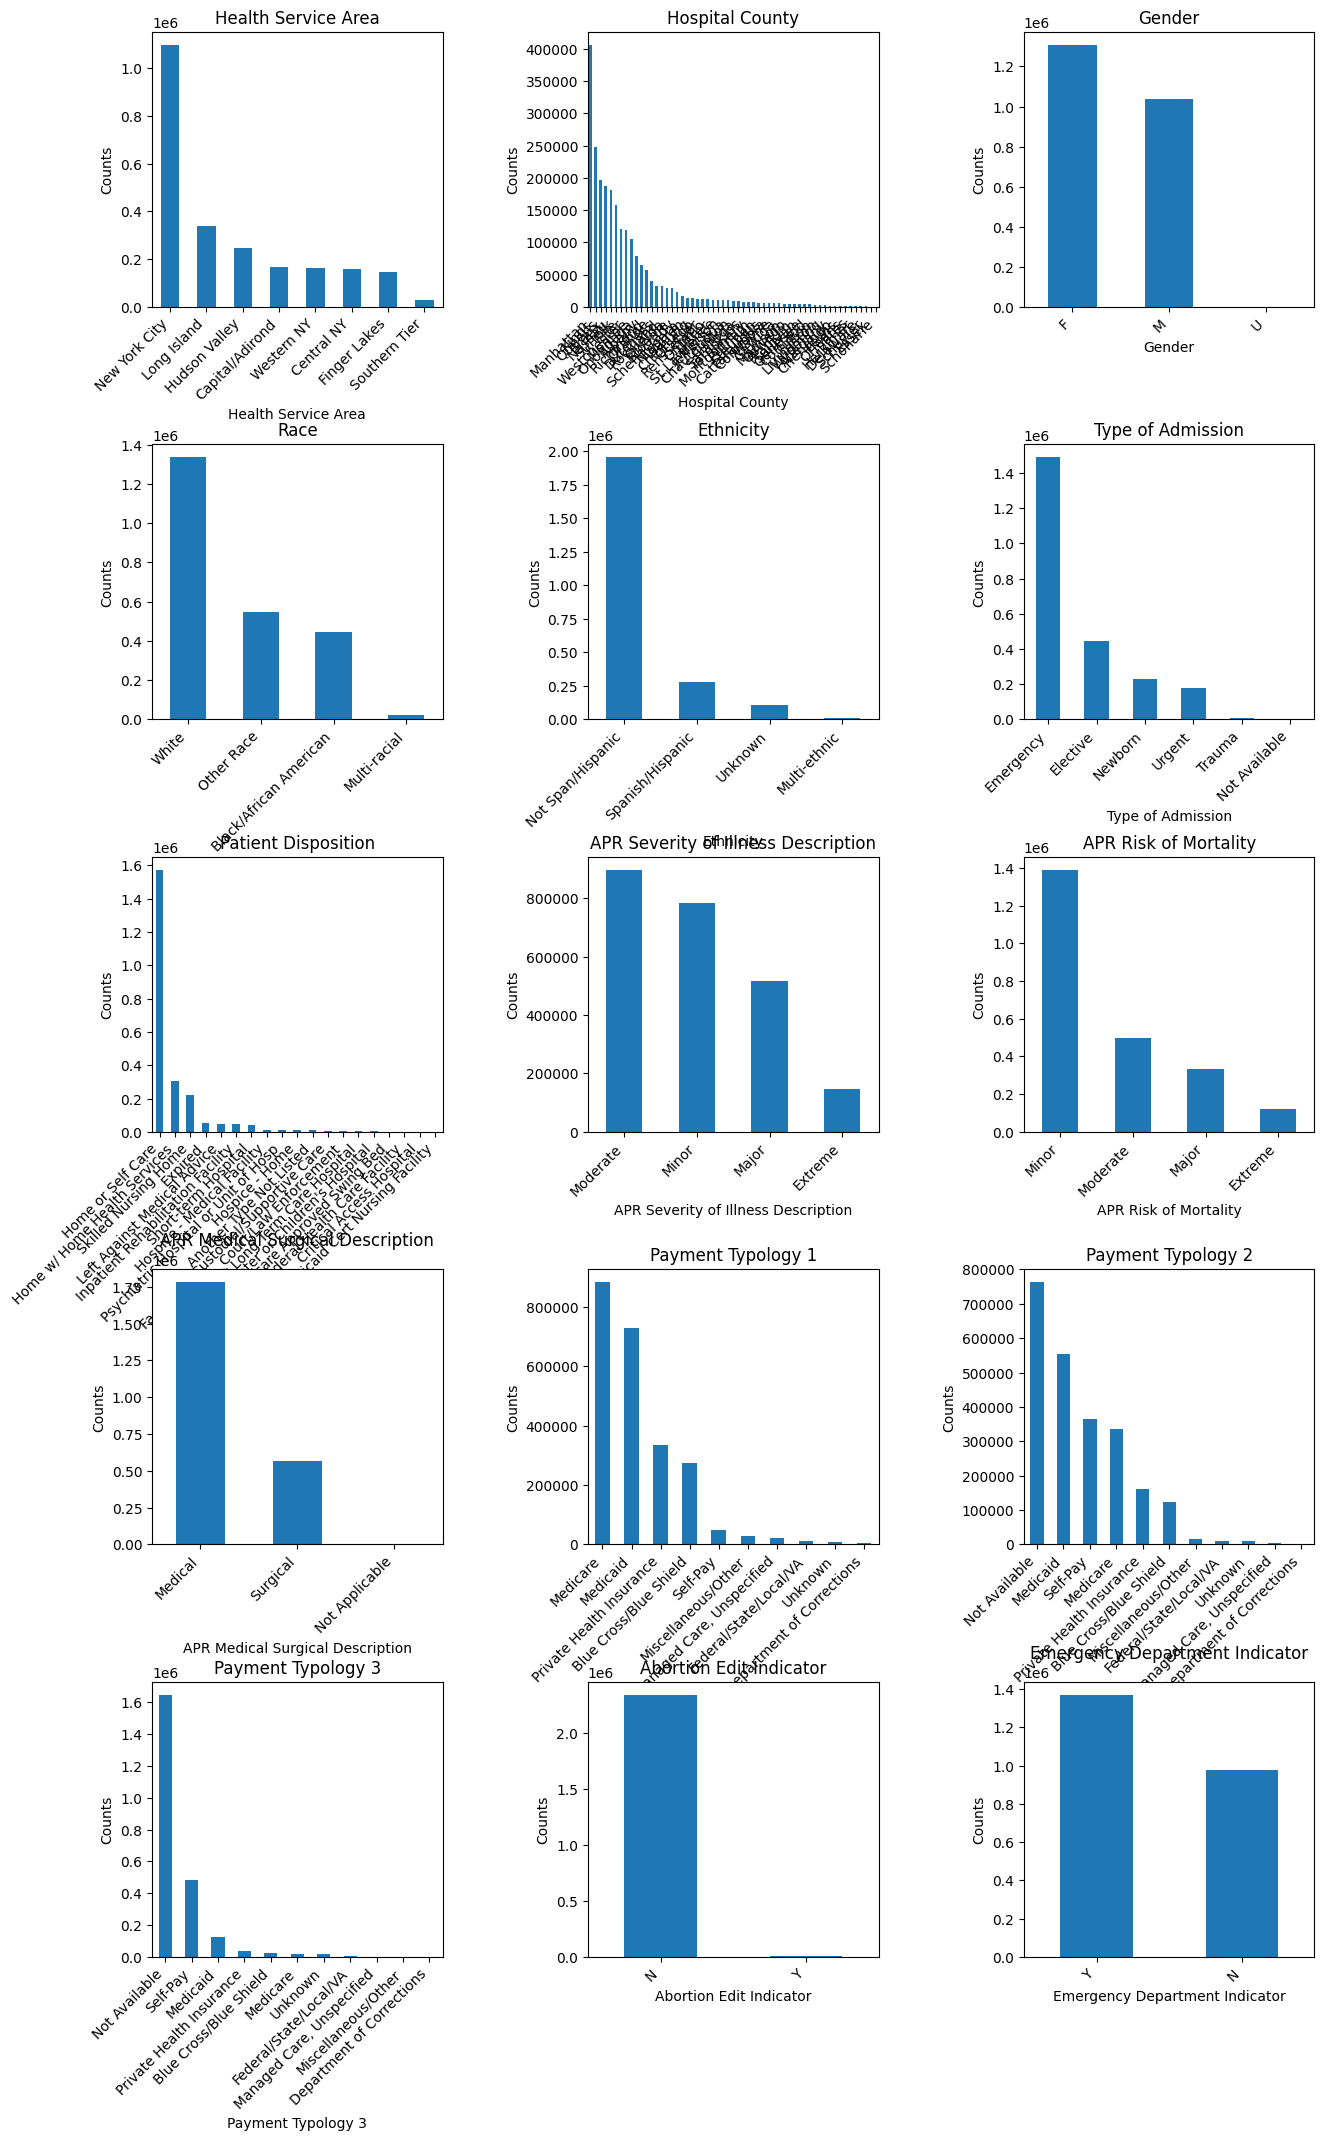

In [10]:
import matplotlib.pyplot as plt

# Select categorical columns
categorical_columns = data.select_dtypes(include=['category']).columns

# Define the number of rows and columns for subplots
n_cols = 3  # You can adjust this based on your display preferences
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Computes the necessary number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size as necessary
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing to prevent label overlap

# Plot each categorical variable in a subplot
for i, column in enumerate(categorical_columns):
    ax = axes.flatten()[i]
    data[column].value_counts().plot(kind='bar', ax=ax, title=column)
    ax.set_xlabel(column)
    ax.set_ylabel('Counts')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate labels to prevent overlap

# If there are any leftover axes, turn them off
for j in range(i+1, n_cols * n_rows):
    axes.flatten()[j].axis('off')

# Show plot
plt.show()


### EDA Analysis question 2. Correltion analyisis between target varaible and other numerical variables?

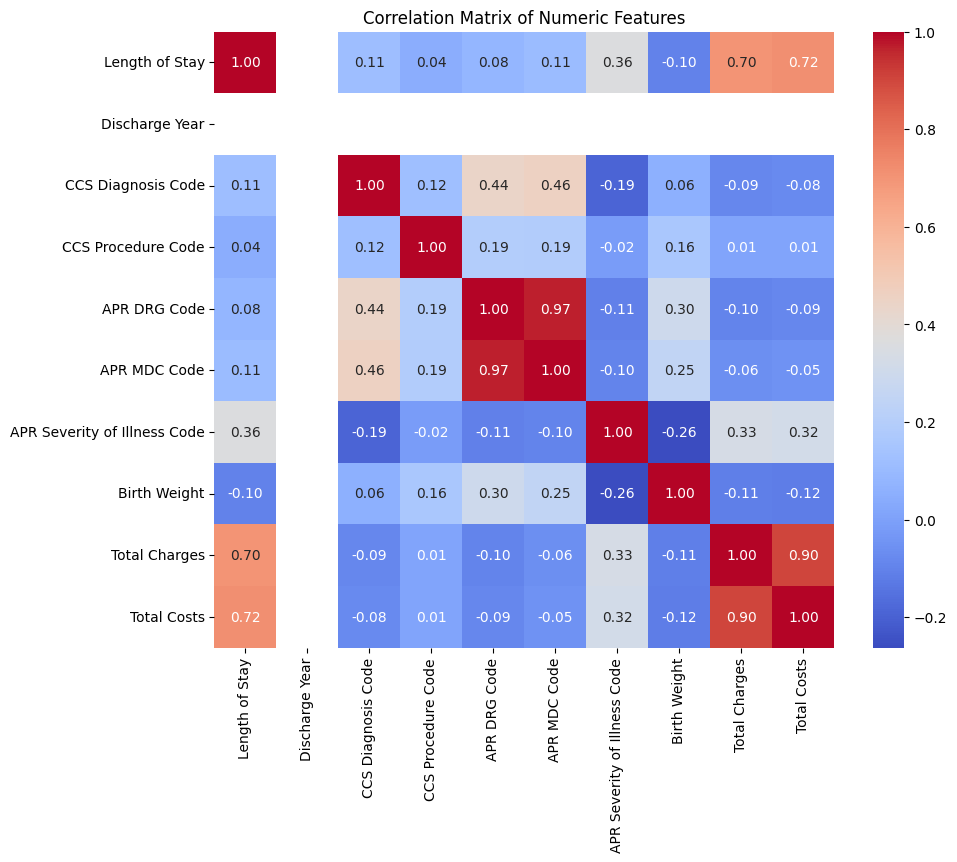

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Use seaborn to create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [45]:
correlation_matrix

,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
Length of Stay,1.000000,NaN,0.114503,0.043801,0.078750,0.106159,0.362886,-0.100493,0.701230,0.717270
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.114503,NaN,1.000000,0.117448,0.440195,0.460168,-0.192200,0.055631,-0.086572,-0.075619
CCS Procedure Code,0.043801,NaN,0.117448,1.000000,0.193728,0.190169,-0.016663,0.160949,0.012619,0.010471
APR DRG Code,0.078750,NaN,0.440195,0.193728,1.000000,0.968579,-0.107333,0.295980,-0.095104,-0.088661
APR MDC Code,0.106159,NaN,0.460168,0.190169,0.968579,1.000000,-0.097510,0.250306,-0.061353,-0.053332
APR Severity of Illness Code,0.362886,NaN,-0.192200,-0.016663,-0.107333,-0.097510,1.000000,-0.262235,0.330829,0.315720
Birth Weight,-0.100493,NaN,0.055631,0.160949,0.295980,0.250306,-0.262235,1.000000,-0.112461,-0.117292
Total Charges,0.701230,NaN,-0.086572,0.012619,-0.095104,-0.061353,0.330829,-0.112461,1.000000,0.901760
Total Costs,0.717270,NaN,-0.075619,0.010471,-0.088661,-0.053332,0.315720,-0.117292,0.901760,1.000000


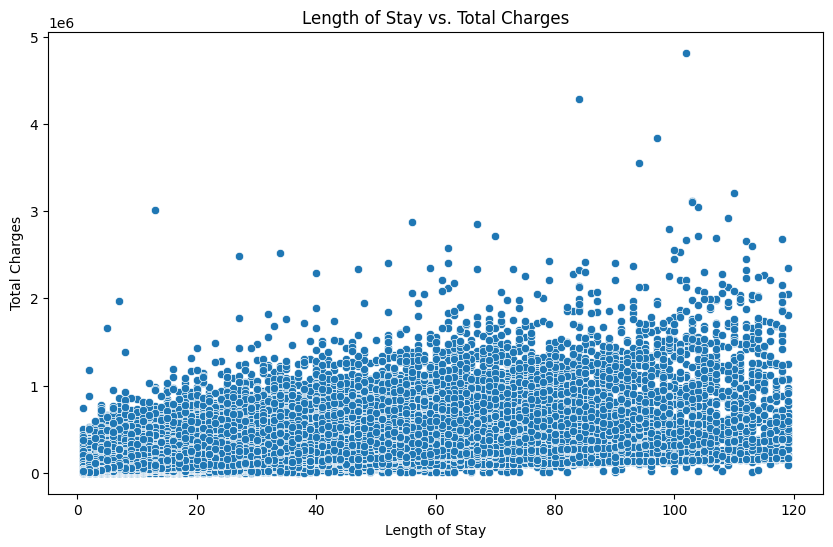

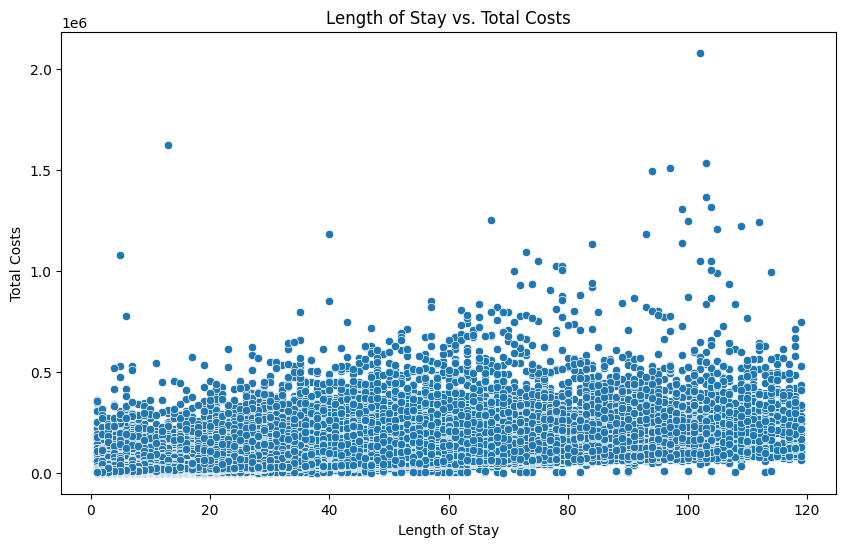

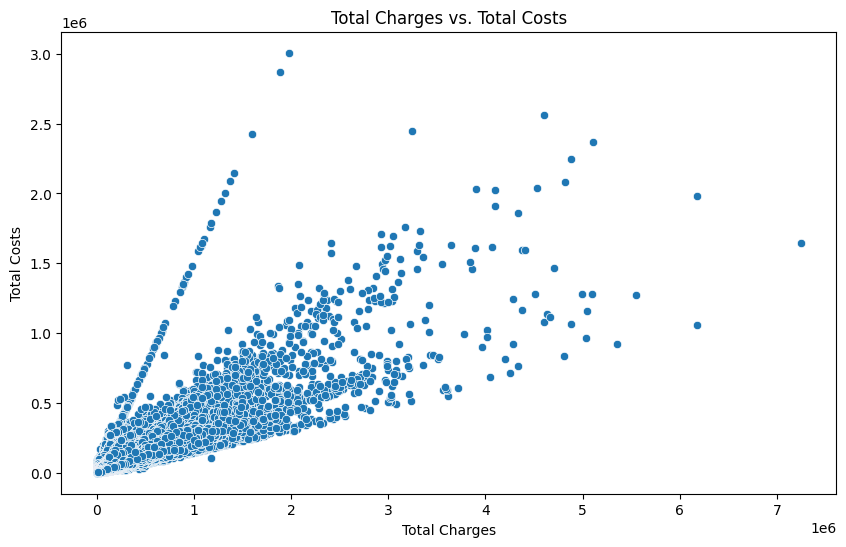

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Length of Stay vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Length of Stay'], y=data['Total Charges'])
plt.title('Length of Stay vs. Total Charges')
plt.xlabel('Length of Stay')
plt.ylabel('Total Charges')
plt.show()

# Length of Stay vs. Total Costs
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Length of Stay'], y=data['Total Costs'])
plt.title('Length of Stay vs. Total Costs')
plt.xlabel('Length of Stay')
plt.ylabel('Total Costs')
plt.show()

# Total Charges vs. Total Costs
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Total Charges'], y=data['Total Costs'])
plt.title('Total Charges vs. Total Costs')
plt.xlabel('Total Charges')
plt.ylabel('Total Costs')
plt.show()


### EDA Analysis question 3. Can we find a relationship between Total Cost and CCS Diagnosis Description across different facilities?

In [13]:
# Grouping and aggregating the data
costs_by_diagnosis_facility = data.groupby(['Facility Name', 'CCS Diagnosis Description'])['Total Costs'].mean().reset_index()

# Sorting the results to make them more readable
costs_by_diagnosis_facility_sorted = costs_by_diagnosis_facility.sort_values(by='Total Costs', ascending=False)

costs_by_diagnosis_facility_sorted.head(10)


,Facility Name,CCS Diagnosis Description,Total Costs
9676,Henry J. Carter Specialty Hospital,Nephritis; nephrosis; renal sclerosis,667453.140000
9673,Henry J. Carter Specialty Hospital,Complications of surgical procedures or medica...,636134.816667
9684,Henry J. Carter Specialty Hospital,Septicemia (except in labor),504184.410000
37432,Woodhull Medical & Mental Health Center,Short gestation; low birth weight; and fetal g...,460263.023333
26480,Redacted for Confidentiality,Non-Hodgkin`s lymphoma,437979.240000
9682,Henry J. Carter Specialty Hospital,Respiratory failure; insufficiency; arrest (ad...,433597.817375
23211,North Central Bronx Hospital,Encephalitis (except that caused by tuberculos...,429753.190000
9286,Harlem Hospital Center,Systemic lupus erythematosus and connective ti...,423521.878333
21021,New York Presbyterian Hospital - Columbia Pres...,Respiratory distress syndrome,414651.597500
36166,Westchester Medical Center,Melanomas of skin,402187.760000


In [47]:
costs_by_diagnosis_facility_sorted.reset_index().head(10)

,index,Facility Name,CCS Diagnosis Description,Total Costs
0,9676,Henry J. Carter Specialty Hospital,Nephritis; nephrosis; renal sclerosis,667453.140000
1,9673,Henry J. Carter Specialty Hospital,Complications of surgical procedures or medica...,636134.816667
2,9684,Henry J. Carter Specialty Hospital,Septicemia (except in labor),504184.410000
3,37432,Woodhull Medical & Mental Health Center,Short gestation; low birth weight; and fetal g...,460263.023333
4,26480,Redacted for Confidentiality,Non-Hodgkin`s lymphoma,437979.240000
5,9682,Henry J. Carter Specialty Hospital,Respiratory failure; insufficiency; arrest (ad...,433597.817375
6,23211,North Central Bronx Hospital,Encephalitis (except that caused by tuberculos...,429753.190000
7,9286,Harlem Hospital Center,Systemic lupus erythematosus and connective ti...,423521.878333
8,21021,New York Presbyterian Hospital - Columbia Pres...,Respiratory distress syndrome,414651.597500
9,36166,Westchester Medical Center,Melanomas of skin,402187.760000


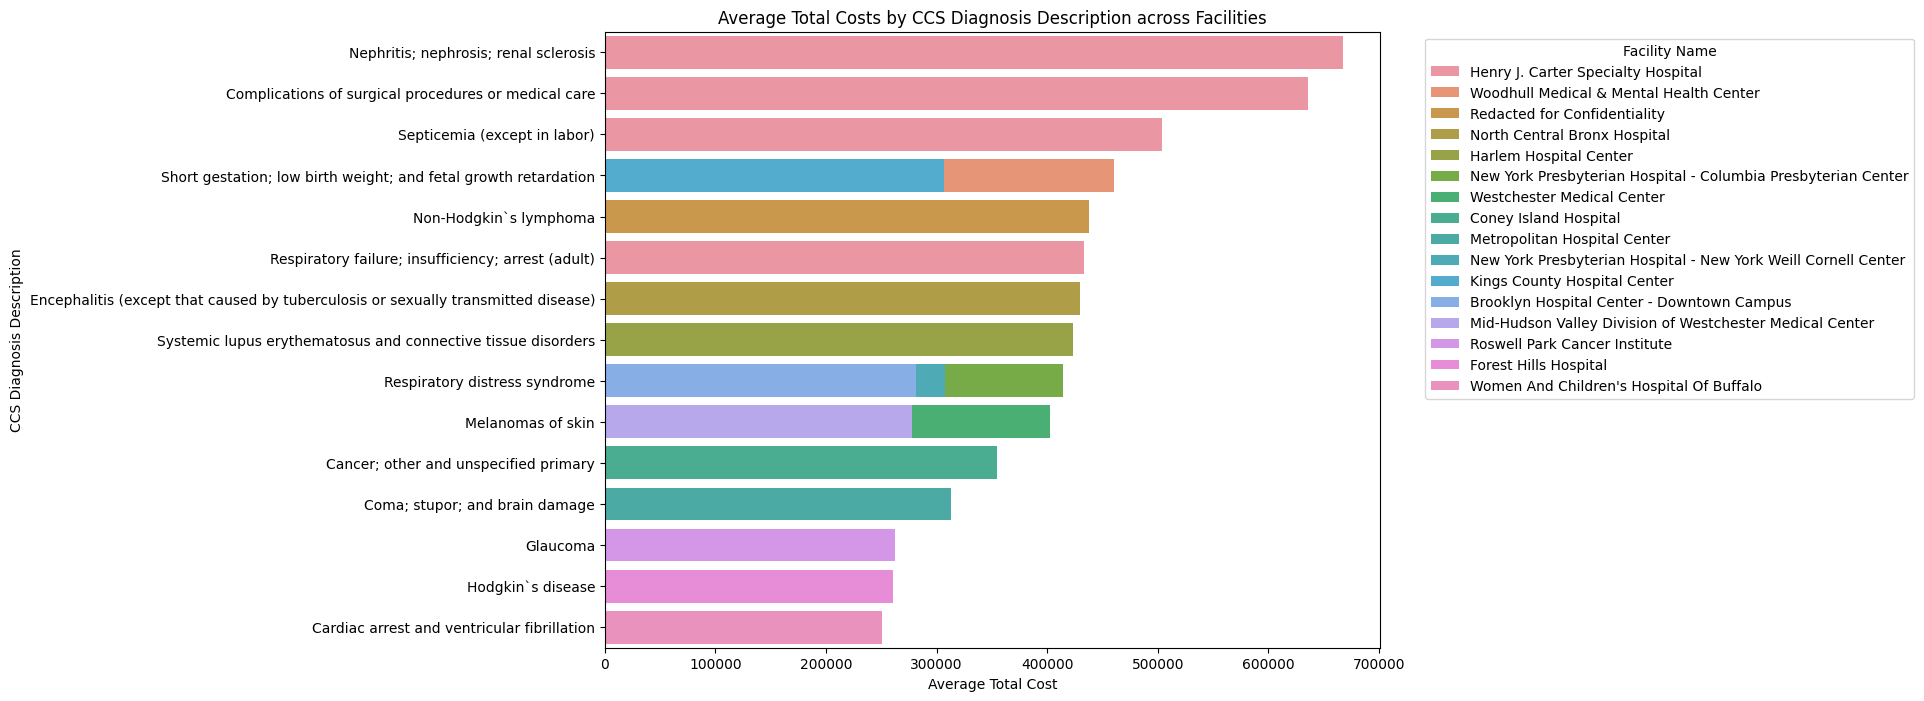

In [14]:
# Selecting the top N for visualization for clarity, N can be decided based on the data
top_n = costs_by_diagnosis_facility_sorted.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x='Total Costs', y='CCS Diagnosis Description', hue='Facility Name', data=top_n, dodge=False)
plt.title('Average Total Costs by CCS Diagnosis Description across Facilities')
plt.xlabel('Average Total Cost')
plt.ylabel('CCS Diagnosis Description')
plt.legend(title='Facility Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Prediction Question 1:

    
### Question: Can we predict the total costs associated with a hospital inpatient stay based on available features such as the patient’s demographics (age, gender, race, ethnicity), admission type, length of stay, diagnosis, procedures performed, severity of illness, and hospital characteristics?


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'data' is your DataFrame and is already loaded

# Selecting features and target variable
X = data.drop('Total Costs', axis=1)  # all columns except Total Costs
y = data['Total Costs']  # Total Costs column

# Handling categorical variables with OneHotEncoding
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object" or X[cname].dtype.name == "category"]

# Preprocessing for numerical data
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundling preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', SimpleImputer(strategy='median'), numerical_cols)
    ])

# Splitting data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model pipelines
linear_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('model', LinearRegression())])

random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=5, max_depth=5, min_samples_leaf=5, max_features='sqrt', n_jobs=-1, random_state=0))
])

In [17]:
# Train the models
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Health Service Area',
                                                   'Hospital County',
                                                   'Facility Name', 'Age Group',
                                                   'Zip Code - 3 digits',
                                                   'Gender', 'Race',
                                                   'Ethnicity',
                                                   'Type of Admission',
                                                   'Patient Disposition',
                                                   'CCS Diagno...
                                                   'Description',
                                                   'Payment Typology 1',
                                                   'Payment Typology 2',
                                                   'Payment Typology 3',
                                                   'Abortion Edit Indicator',
                                                   'Emergency Department '
                                                   'Indicator']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Length of Stay',
                                                   'Discharge Year',
                                                   'CCS Diagnosis Code',
                                                   'CCS Procedure Code',
                                                   'APR DRG Code',
                                                   'APR MDC Code',
                                                   'APR Severity of Illness '
                                                   'Code',
                                                   'Birth Weight',
                                                   'Total Charges'])])),
                ('model', LinearRegression())])

In [18]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Health Service Area',
                                                   'Hospital County',
                                                   'Facility Name', 'Age Group',
                                                   'Zip Code - 3 digits',
                                                   'Gender', 'Race',
                                                   'Ethnicity',
                                                   'Type of Admission',
                                                   'Patient Disposition',
                                                   'CCS Diagno...
                                                   'Emergency Department '
                                                   'Indicator']),
                                                 ('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Length of Stay',
                                                   'Discharge Year',
                                                   'CCS Diagnosis Code',
                                                   'CCS Procedure Code',
                                                   'APR DRG Code',
                                                   'APR MDC Code',
                                                   'APR Severity of Illness '
                                                   'Code',
                                                   'Birth Weight',
                                                   'Total Charges'])])),
                ('model',
                 RandomForestRegressor(max_depth=5, max_features='sqrt',
                                       min_samples_leaf=5, n_estimators=5,
                                       n_jobs=-1, random_state=0))])

In [19]:
# Function to evaluate models
def evaluate_model(model, X_valid, y_valid):
    predictions = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, predictions)
    mse = mean_squared_error(y_valid, predictions)
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    r2 = r2_score(y_valid, predictions)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    return predictions


def plot_predictions(model, X_valid, y_valid, model_name):
    predictions = model.predict(X_valid)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_valid, y=predictions)
    plt.title(f'{model_name} Predictions vs. Actual for Total Costs')
    plt.xlabel('Actual Total Costs')
    plt.ylabel('Predicted Total Costs')
    plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)  # Line for perfect predictions
    plt.show()
    
    
    
def plot_residuals(model, X_valid, y_valid, model_name):
    predictions = model.predict(X_valid)
    residuals = y_valid - predictions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals)
    plt.title(f'{model_name} Residuals for Total Costs')
    plt.xlabel('Predicted Total Costs')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', lw=2)  # Line at zero for no residuals
    plt.show()

Linear Regression Performance:
MAE: 4264.450232971393
MSE: 144006157.9771342
RMSE: 12000.256579637546
R^2: 0.8204563665822786


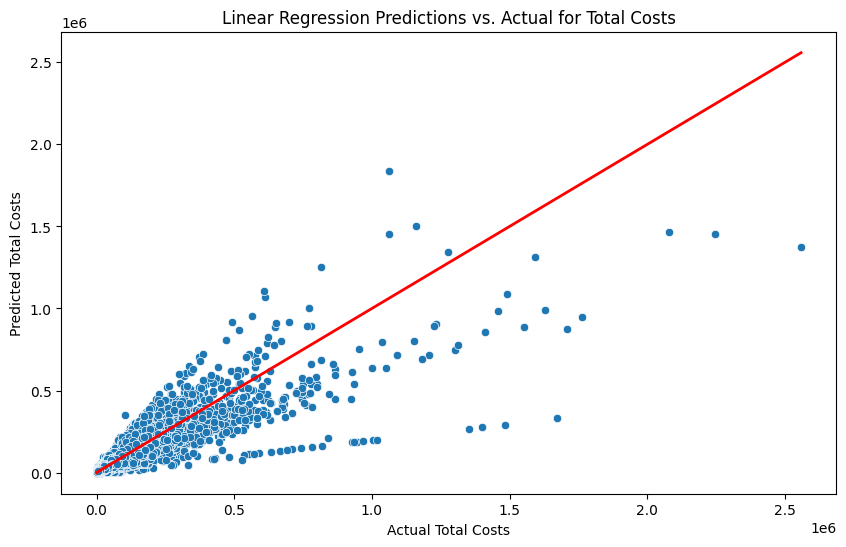

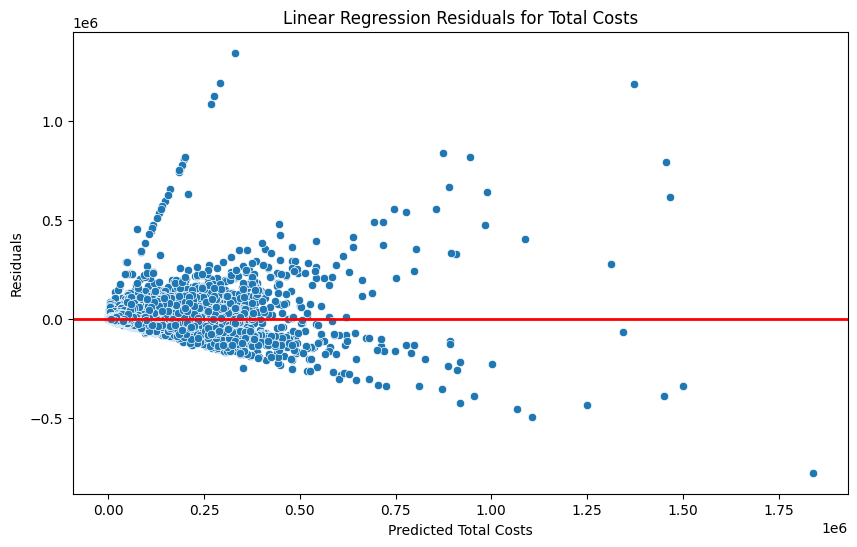

In [20]:
# Evaluate Linear Regression Model
print("Linear Regression Performance:")
lr_predictions = evaluate_model(linear_regression_pipeline, X_valid, y_valid)

# Plot for Linear Regression
plot_predictions(linear_regression_pipeline, X_valid, y_valid, 'Linear Regression')

# Residual plots for Linear Regression
plot_residuals(linear_regression_pipeline, X_valid, y_valid, 'Linear Regression')



Random Forest Performance:
MAE: 8646.483225430744
MSE: 536945710.0360096
RMSE: 23172.0890304696
R^2: 0.3305481857016771


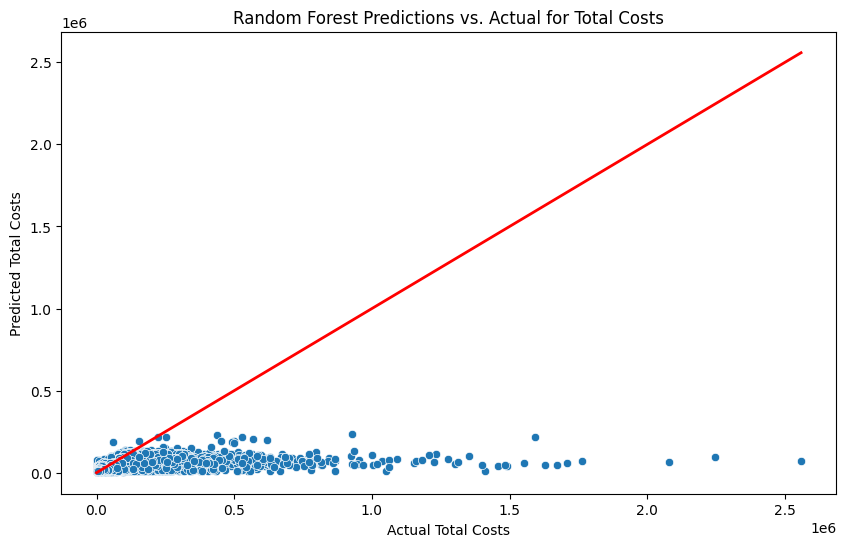

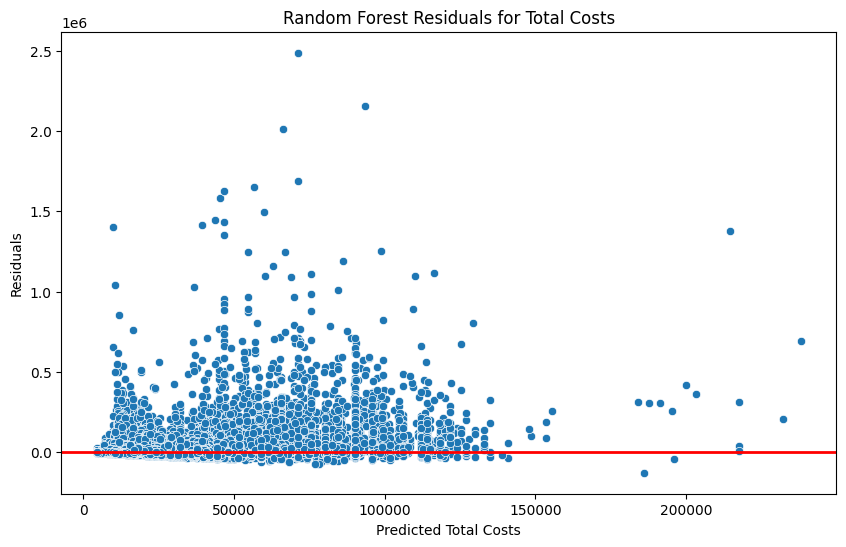

In [21]:
# Evaluate Random Forest Model
print("\nRandom Forest Performance:")
rf_predictions = evaluate_model(random_forest_pipeline, X_valid, y_valid)

# Plot for Random Forest
plot_predictions(random_forest_pipeline, X_valid, y_valid, 'Random Forest')

# Residual plots for Random Forest
plot_residuals(random_forest_pipeline, X_valid, y_valid, 'Random Forest')

## Predicting Question 2: Predicting Length of Stay:


### Question: Is it possible to predict the length of stay for a patient given their diagnosis, severity of illness, and the type of procedures they will undergo?

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Replace '120 +' with 121 (or another number based on your understanding of the data)
data['Length of Stay'] = data['Length of Stay'].replace('120 +', 121)

# Convert 'Length of Stay' to numeric
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'])


data = data.dropna(subset=['Length of Stay'])


# Selecting relevant features
features = [
    'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
    'APR Severity of Illness Code', 'Type of Admission', 'Patient Disposition',
    'Age Group', 'Gender'
]


# Select features and target
X = data[features]
y = data['Length of Stay']

# Handling categorical variables with OneHotEncoding and numerical with StandardScaler
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Scaling is generally helpful for KNN
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Linear Regression
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])



In [37]:
# Random Forest Regression
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42))
])
random_forest_pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age Group']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CCS Diagnosis Code',
                                                   'CCS Procedure Code',
                                                   'APR DRG Code',
                                                   'APR MDC Code',
                                                   'APR Severity of Illness '
                                                   'Code'])])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_estimators=10,
                                       random_state=42))])

In [38]:
# K-Nearest Neighbors Regression
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5, leaf_size=50))
])


In [39]:
# Function to evaluate models
def evaluate_model(model, X_valid, y_valid):
    predictions = model.predict(X_valid)
    mae = mean_absolute_error(y_valid, predictions)
    mse = mean_squared_error(y_valid, predictions)
    rmse = mean_squared_error(y_valid, predictions, squared=False)
    r2 = r2_score(y_valid, predictions)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    

def plot_predictions(model, X_valid, y_valid, model_name):
    predictions = model.predict(X_valid)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_valid, y=predictions)
    plt.title(f'{model_name} Predictions vs. Actual')
    plt.xlabel('Actual Length of Stay')
    plt.ylabel('Predicted Length of Stay')
    plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)  # Line for perfect predictions
    plt.show()
    
def plot_residuals(model, X_valid, y_valid, model_name):
    predictions = model.predict(X_valid)
    residuals = y_valid - predictions
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals)
    plt.title(f'{model_name} Residuals')
    plt.xlabel('Predicted Length of Stay')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', lw=2)  # Line at 0 for no residuals
    plt.show()
    

Linear Regression Performance:
MAE: 3.4877473917804505
MSE: 44.721708408018735
RMSE: 6.687429132934325
R^2: 0.1774016924455143


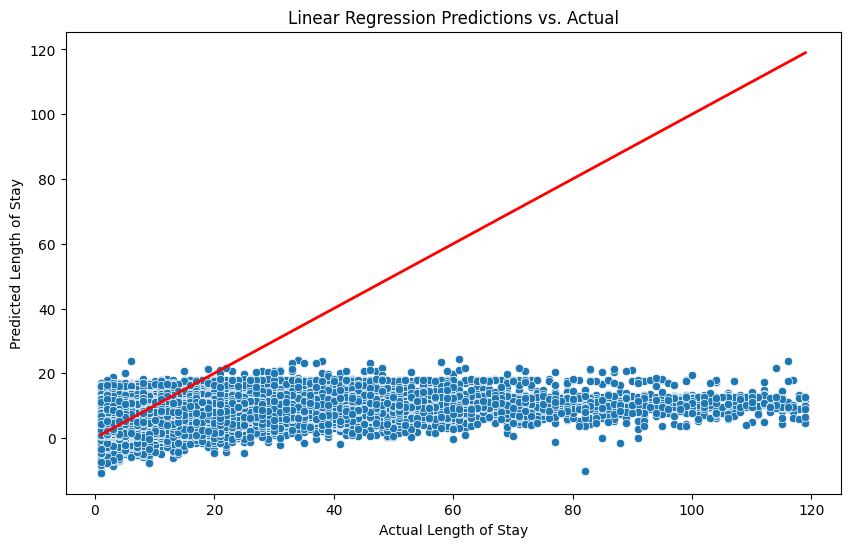

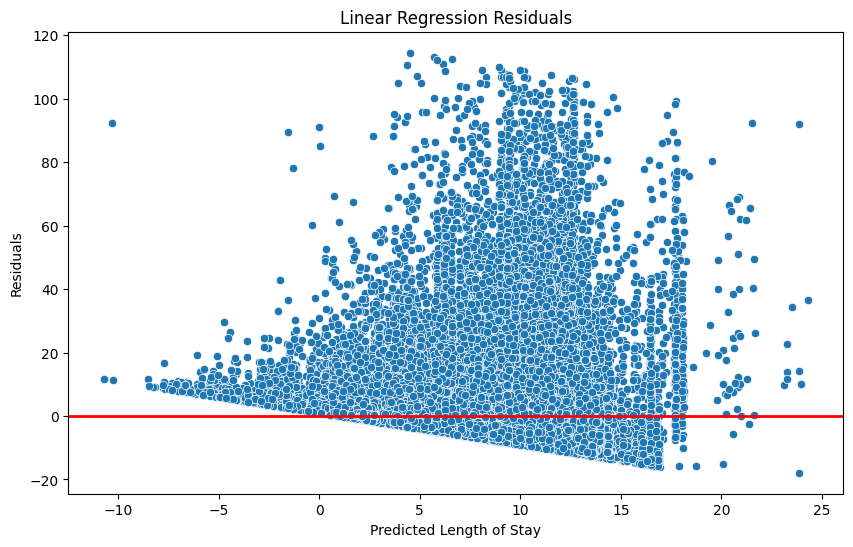

In [40]:
# Train and evaluate Linear Regression
linear_regression_pipeline.fit(X_train, y_train)
print("Linear Regression Performance:")
evaluate_model(linear_regression_pipeline, X_valid, y_valid)

# Plot for each model
plot_predictions(linear_regression_pipeline, X_valid, y_valid, 'Linear Regression')

plot_residuals(linear_regression_pipeline, X_valid, y_valid, 'Linear Regression')



Random Forest Regression Performance:
MAE: 3.0555596038423296
MSE: 36.99893260262486
RMSE: 6.082674790141658
R^2: 0.3194522207746302


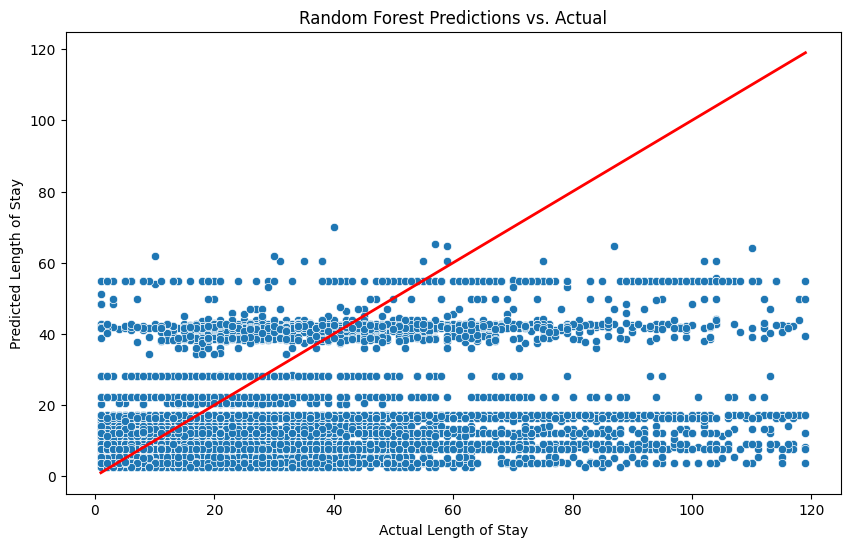

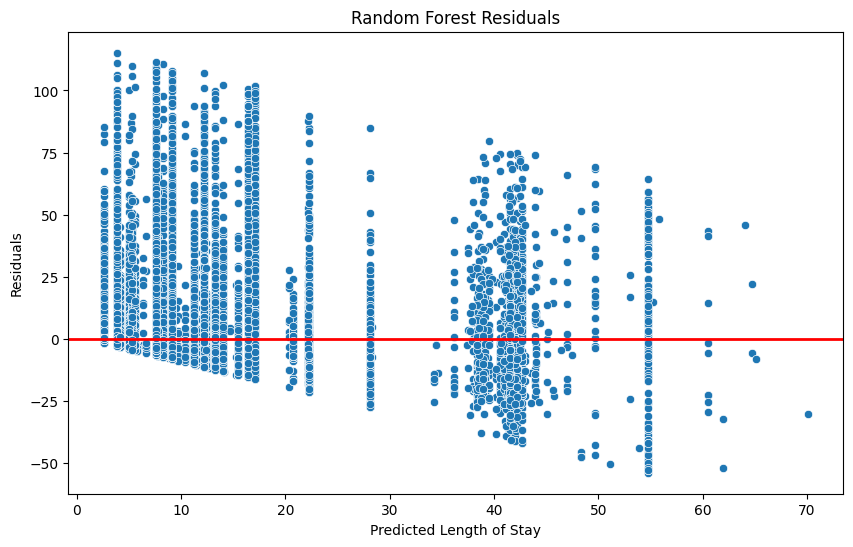

In [41]:
# Train and evaluate Random Forest Regression
random_forest_pipeline.fit(X_train, y_train)
print("\nRandom Forest Regression Performance:")
evaluate_model(random_forest_pipeline, X_valid, y_valid)
plot_predictions(random_forest_pipeline, X_valid, y_valid, 'Random Forest')
plot_residuals(random_forest_pipeline, X_valid, y_valid, 'Random Forest')



KNN Regression Performance:
MAE: 2.963097476834381
MSE: 36.687603952120824
RMSE: 6.0570293009131815
R^2: 0.3251787108867997


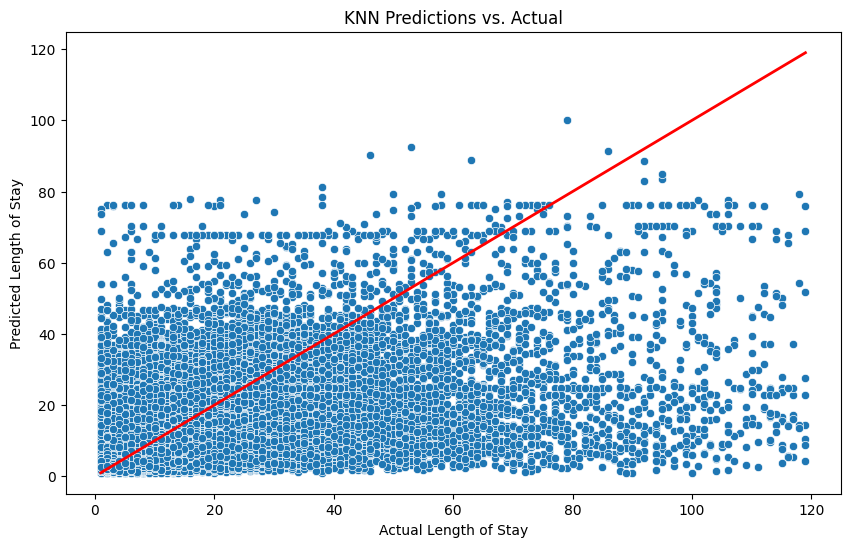

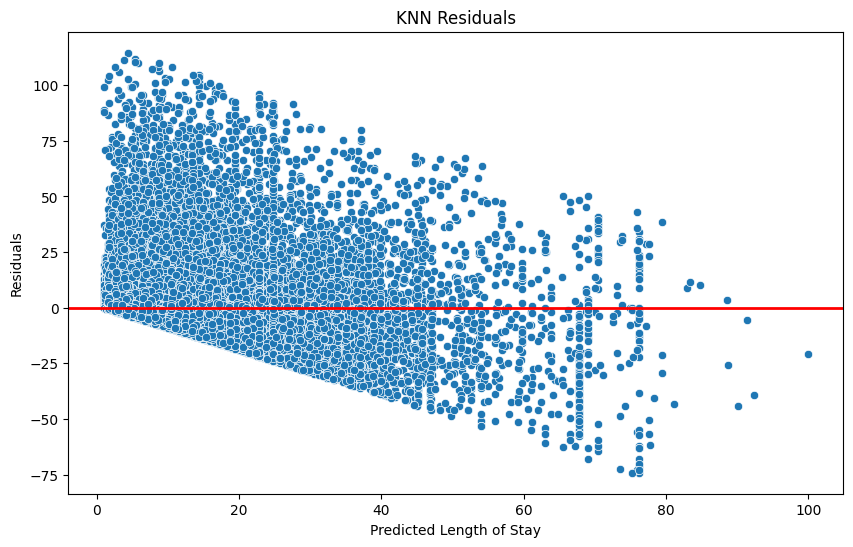

In [42]:
# Train and evaluate KNN Regression
knn_pipeline.fit(X_train, y_train)
print("\nKNN Regression Performance:")
evaluate_model(knn_pipeline, X_valid, y_valid)
plot_predictions(knn_pipeline, X_valid, y_valid, 'KNN')
plot_residuals(knn_pipeline, X_valid, y_valid, 'KNN')
